# Recommender Systems Using Correlation

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
S:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading Data

column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie=pd.read_csv('Movie_Id_Titles')

In [7]:
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
# Merging the two Dataframes

df=pd.merge(df,movie,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [9]:
# getting mean rating for each movie

df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
# Getting total count of rating for each movie

df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
# Creating Data-frame of ratings of movie

rating=pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
# Adding count of rating in Data-frame

rating['number_of_rating']=pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,number_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


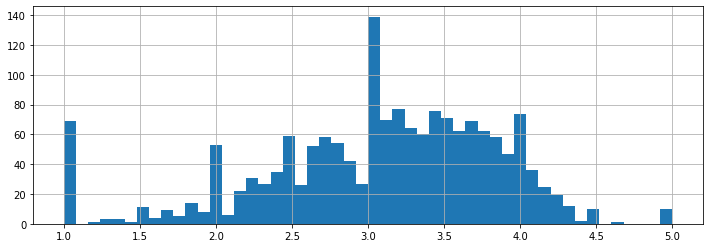

In [13]:
# Visualizing the distribution of ratings

plt.figure(figsize=(12,4))
rating['rating'].hist(bins=50)

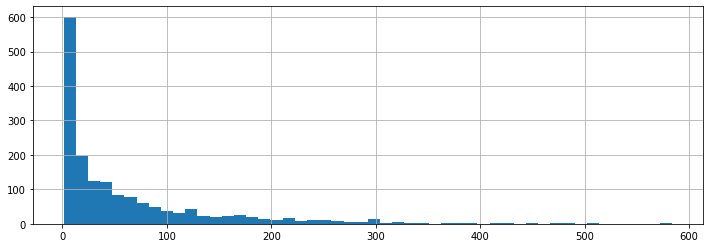

In [14]:
# Visualizing the distribution of count of rating

plt.figure(figsize=(12,4))
rating['number_of_rating'].hist(bins=50)

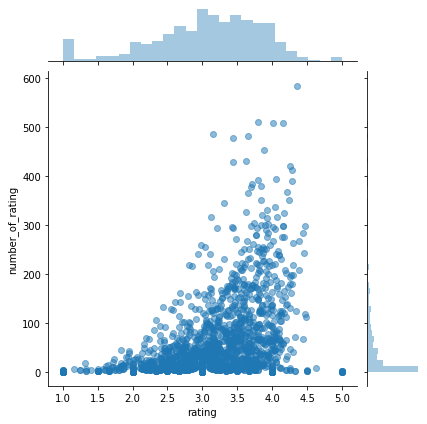

In [15]:
sns.jointplot(x='rating',y='number_of_rating',data=rating,alpha=.5)

# Recommending Similar movies

In [16]:
# Creating pivot table with user_id as index and movie as row having rating in values  

moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# there are 944 users and 1664 movies in data set

print('Shape of matrix:',moviemat.shape)

Shape of matrix: (944, 1664)


In [18]:
# Taking a user rating of movie Star Wars as an example

starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [19]:
# Calculating Correlation between Star Wars and all the other movie.
# Similar movies will have higher correlation.

similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [20]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [21]:
# Creating Data-frame of correlation of Star wars with other movies

corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [22]:
# Adding count of ratings in above Data-frame

corr_starwars = corr_starwars.join(rating['number_of_rating'])
corr_starwars.head()

,Correlation,number_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [23]:
# Applying condition to recommend only those movies having count of rating greater than 100

recommend_movie=corr_starwars[corr_starwars['number_of_rating']>100].sort_values('Correlation',ascending=False).head(10)

In [24]:
# If you watched Star Wars then you should watch all the movies given below

recommend_movie.head()

,Correlation,number_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# Final Recommender system

In [25]:
# Defining a function using all the above steps and recommend movies using correlation

def recom_Movie(mov):
    mov_user_ratings = moviemat[mov]
    similar_to_mov = moviemat.corrwith(mov_user_ratings)
    corr_mov = pd.DataFrame(similar_to_mov,columns=['Correlation'])
    corr_mov.dropna(inplace=True)
    corr_mov = corr_mov.join(rating['number_of_rating'])
    recommend_movies=corr_mov[corr_mov['number_of_rating']>100].sort_values('Correlation',ascending=False).head(11)
    recommend_movies= recommend_movies.iloc[1:]
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,7))
    axis1=sns.barplot(x=recommend_movies['Correlation'],y=recommend_movies.index,linewidth=1.5,edgecolor="black")
    plt.title('Movies to watch if you watched '+str(mov),weight='bold',color='b',fontsize=15)
    plt.xlabel('Preference',weight='bold',fontsize=15)
    plt.ylabel('Movie name',weight='bold',fontsize=15)
    plt.yticks(fontsize=13)
    plt.grid(True)

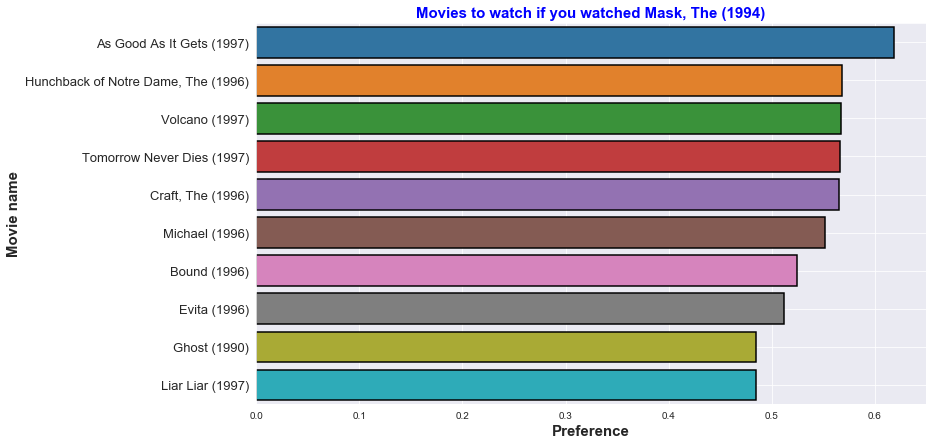

In [27]:
# Checking recommendation system

m='Mask, The (1994)'
recom_Movie(m)